In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [515]:
df1 = pd.read_csv("MushroomDataset/primary_data.csv", sep=';')
df2 = pd.read_csv("MushroomDataset/secondary_data.csv", sep=';')

In [516]:
df2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [517]:
df2.isnull().sum()/61069

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-root               0.843931
stem-surface            0.624277
stem-color              0.000000
veil-type               0.947977
veil-color              0.878613
has-ring                0.000000
ring-type               0.040462
spore-print-color       0.895954
habitat                 0.000000
season                  0.000000
dtype: float64

In [518]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [519]:
for col in df2:
    print(df2[col].unique())

['p' 'e']
[15.26 16.6  14.07 ... 22.85 21.8  20.42]
['x' 'f' 'p' 'b' 'c' 's' 'o']
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
['f' 't']
['e' nan 'a' 'd' 's' 'x' 'p' 'f']
[nan 'c' 'd' 'f']
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
[16.95 17.99 17.8  ...  1.23  1.16  0.  ]
[17.09 18.19 17.74 ... 32.59 30.99 30.51]
['s' nan 'b' 'r' 'c' 'f']
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
['u' nan]
['w' 'y' nan 'n' 'e' 'u' 'k']
['t' 'f']
['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
[nan 'w' 'p' 'k' 'r' 'u' 'n' 'g']
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
['w' 'u' 'a' 's']


In [520]:
df2['class'].replace('p', 0, inplace=True)
df2['class'].replace('e', 1, inplace=True)
df2.replace({'cap-shape' : {'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat',
                                's':'sunken', 'p':'spherical', 'o':'others'},
             'cap-color':{'n':'cap_brown', 'b':'cap_buff', 'g':'cap_gray', 'r':'cap_green', 'p':'cap_pink',
								'u':'cap_purple', 'e':'cap_red', 'w':'cap_white', 'y':'cap_yellow', 'l':'cap_blue','o':'cap_orange',  'k':'cap_black'},
             'does-bruise-or-bleed' : {'t':'bruises-or-bleeding','f':'no bruises-or-bleeding'},
             'gill-color' : {'n':'gill_brown', 'b':'gill_buff', 'g':'gill_gray', 'r':'gill_green', 'p':'gill_pink',
								'u':'gill_purple', 'e':'gill_red', 'w':'gill_white', 'y':'gill_yellow', 'l':'gill_blue','o':'gill_orange',  'k':'gill_black', 'f':'gill_none'},
             'stem-color' : {'n':'stem_brown', 'b':'stem_buff', 'g':'stem_gray', 'r':'stem_green', 'p':'stem_pink',
								'u':'stem_purple', 'e':'stem_red', 'w':'stem_white', 'y':'stem_yellow', 'l':'stem_blue','o':'stem_orange',  'k':'stem_black', 'f':'stem_none'},
             'has-ring' : {'t':'has ring', 'f':'no ring'},
             'habitat' : {'d':'woods', 'm':'meadows', 'g':'grasses', 'h':'heaths', 'l':'leaves', 'p':'paths', 'w':'waste', 'u':'urban'},
             'season' : {'w':'winter', 'u':'summer', 'a':'autumn', 's':'spring'}
            }, inplace=True)
# df2.replace({}, inplace=True)
# df2.replace({}, inplace=True)
df2 = df2.drop(columns = ['veil-color', 'spore-print-color', 'veil-type', 'stem-surface', 'stem-root', 'gill-spacing', 'cap-surface', 'gill-attachment', 'ring-type'])

In [521]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  habitat               61069 non-null  object 
 11  season                61069 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5.6+ MB


In [522]:
column = 'cap-diameter'
df2[column] = df2[column] /df2[column].abs().max() 
column = 'stem-height'
df2[column] = df2[column] /df2[column].abs().max() 
column = 'stem-width'
df2[column] = df2[column] /df2[column].abs().max() 
df2.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,0.244787,convex,cap_orange,no bruises-or-bleeding,gill_white,0.499705,0.164469,stem_white,has ring,woods,winter
1,0,0.266282,convex,cap_orange,no bruises-or-bleeding,gill_white,0.530366,0.175055,stem_white,has ring,woods,summer
2,0,0.225698,convex,cap_orange,no bruises-or-bleeding,gill_white,0.524764,0.170725,stem_white,has ring,woods,winter
3,0,0.227302,flat,cap_red,no bruises-or-bleeding,gill_white,0.464917,0.153787,stem_white,has ring,woods,winter
4,0,0.234841,convex,cap_orange,no bruises-or-bleeding,gill_white,0.487323,0.165528,stem_white,has ring,woods,winter


In [523]:
df2['class'].value_counts()

class
0    33888
1    27181
Name: count, dtype: int64

In [524]:
dummies = pd.get_dummies(df2['cap-shape'], dtype=int)
df2 = pd.concat([df2, dummies], axis=1)
df2 = df2.drop('cap-shape',axis = 1)

df2 = pd.concat([df2, pd.get_dummies(df2['cap-color'], dtype=int)], axis=1)
df2 = df2.drop('cap-color',axis = 1)

df2 = pd.concat([df2, pd.get_dummies(['does-bruise-or-bleed'], dtype=int)], axis=1)
df2 = df2.drop('does-bruise-or-bleed',axis = 1)

df2 = pd.concat([df2, pd.get_dummies(['gill-color'], dtype=int)], axis=1)
df2 = df2.drop('gill-color',axis = 1)

df2 = pd.concat([df2, pd.get_dummies(['stem-color'], dtype=int)], axis=1)
df2 = df2.drop('stem-color',axis = 1)

df2 = pd.concat([df2, pd.get_dummies(['has-ring'], dtype=int)], axis=1)
df2 = df2.drop('has-ring',axis = 1)

df2 = pd.concat([df2, pd.get_dummies(['habitat'], dtype=int)], axis=1)
df2 = df2.drop('habitat',axis = 1)
df2 = pd.concat([df2, pd.get_dummies(['season'], dtype=int)], axis=1)
df2 = df2.drop('season',axis = 1)

# one_hot = pd.get_dummies(df2['cap-shape'])
# df2 = df2.join(one_hot)

In [525]:
df2.head()

,class,cap-diameter,stem-height,stem-width,bell,conical,convex,flat,others,spherical,...,cap_brown,cap_buff,cap_gray,cap_green,cap_orange,cap_pink,cap_purple,cap_red,cap_white,cap_yellow
0,0,0.244787,0.499705,0.164469,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0.266282,0.530366,0.175055,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0.225698,0.524764,0.170725,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0.227302,0.464917,0.153787,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.234841,0.487323,0.165528,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [526]:
df2

,class,cap-diameter,stem-height,stem-width,bell,conical,convex,flat,others,spherical,...,cap_brown,cap_buff,cap_gray,cap_green,cap_orange,cap_pink,cap_purple,cap_red,cap_white,cap_yellow
0,0,0.244787,0.499705,0.164469,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0.266282,0.530366,0.175055,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0.225698,0.524764,0.170725,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0.227302,0.464917,0.153787,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.234841,0.487323,0.165528,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,0.018928,0.115861,0.059859,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
61065,0,0.020372,0.093750,0.052257,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
61066,0,0.020372,0.113797,0.061303,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
61067,0,0.019891,0.104953,0.052353,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [527]:
for col in df2:
    print(df2[col].unique())

[0 1]
[0.24478665 0.26628168 0.22569779 ... 0.36653834 0.34969522 0.32755855]
[0.49970519 0.53036557 0.52476415 ... 0.03626179 0.03419811 0.        ]
[0.16446925 0.17505534 0.17072467 ... 0.3136368  0.29823886 0.29361948]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [528]:
y = df2['class']
x = df2.drop(columns=['class'])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [529]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# pipe = make_pipeline(StandardScaler(),('logreg',LogisticRegression(multi_class="multinomial")))
# param_grid = {
#     'logreg__C': [0.1, 1, 10, 100],
#     'logreg__penalty': ['l1', 'l2', 'elasticnet', None],
#     'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# }
# grid_search = GridSearchCV(pipe, param_grid, cv=5)

# grid_search.fit(xtrain, ytrain)
 
# # Print best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [530]:
LR = LogisticRegression(C=1,class_weight = 'balanced', solver='lbfgs')
LR.fit(xtrain, ytrain)
pred_LR = LR.predict(xtest)

In [531]:
print(accuracy_score(ytest,pred_LR))

0.6782380874406418


In [532]:
print('--------------------------')
print(confusion_matrix(ytest,pred_LR))
print('--------------------------')
print(classification_report(ytest,pred_LR))

--------------------------
[[4185 2531]
 [1399 4099]]
--------------------------
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      6716
           1       0.62      0.75      0.68      5498

    accuracy                           0.68     12214
   macro avg       0.68      0.68      0.68     12214
weighted avg       0.69      0.68      0.68     12214



Text(0.5, 427.9555555555555, 'Predicted diagnosis')

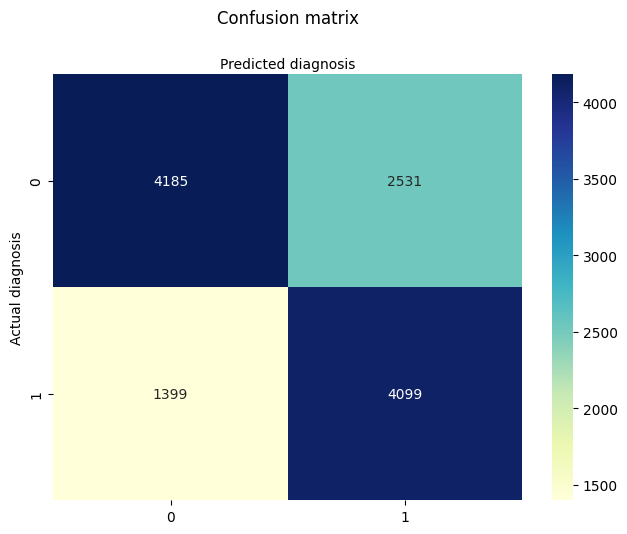

In [533]:
# Import the metrics class
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(ytest, pred_LR)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [534]:
import seaborn as sns

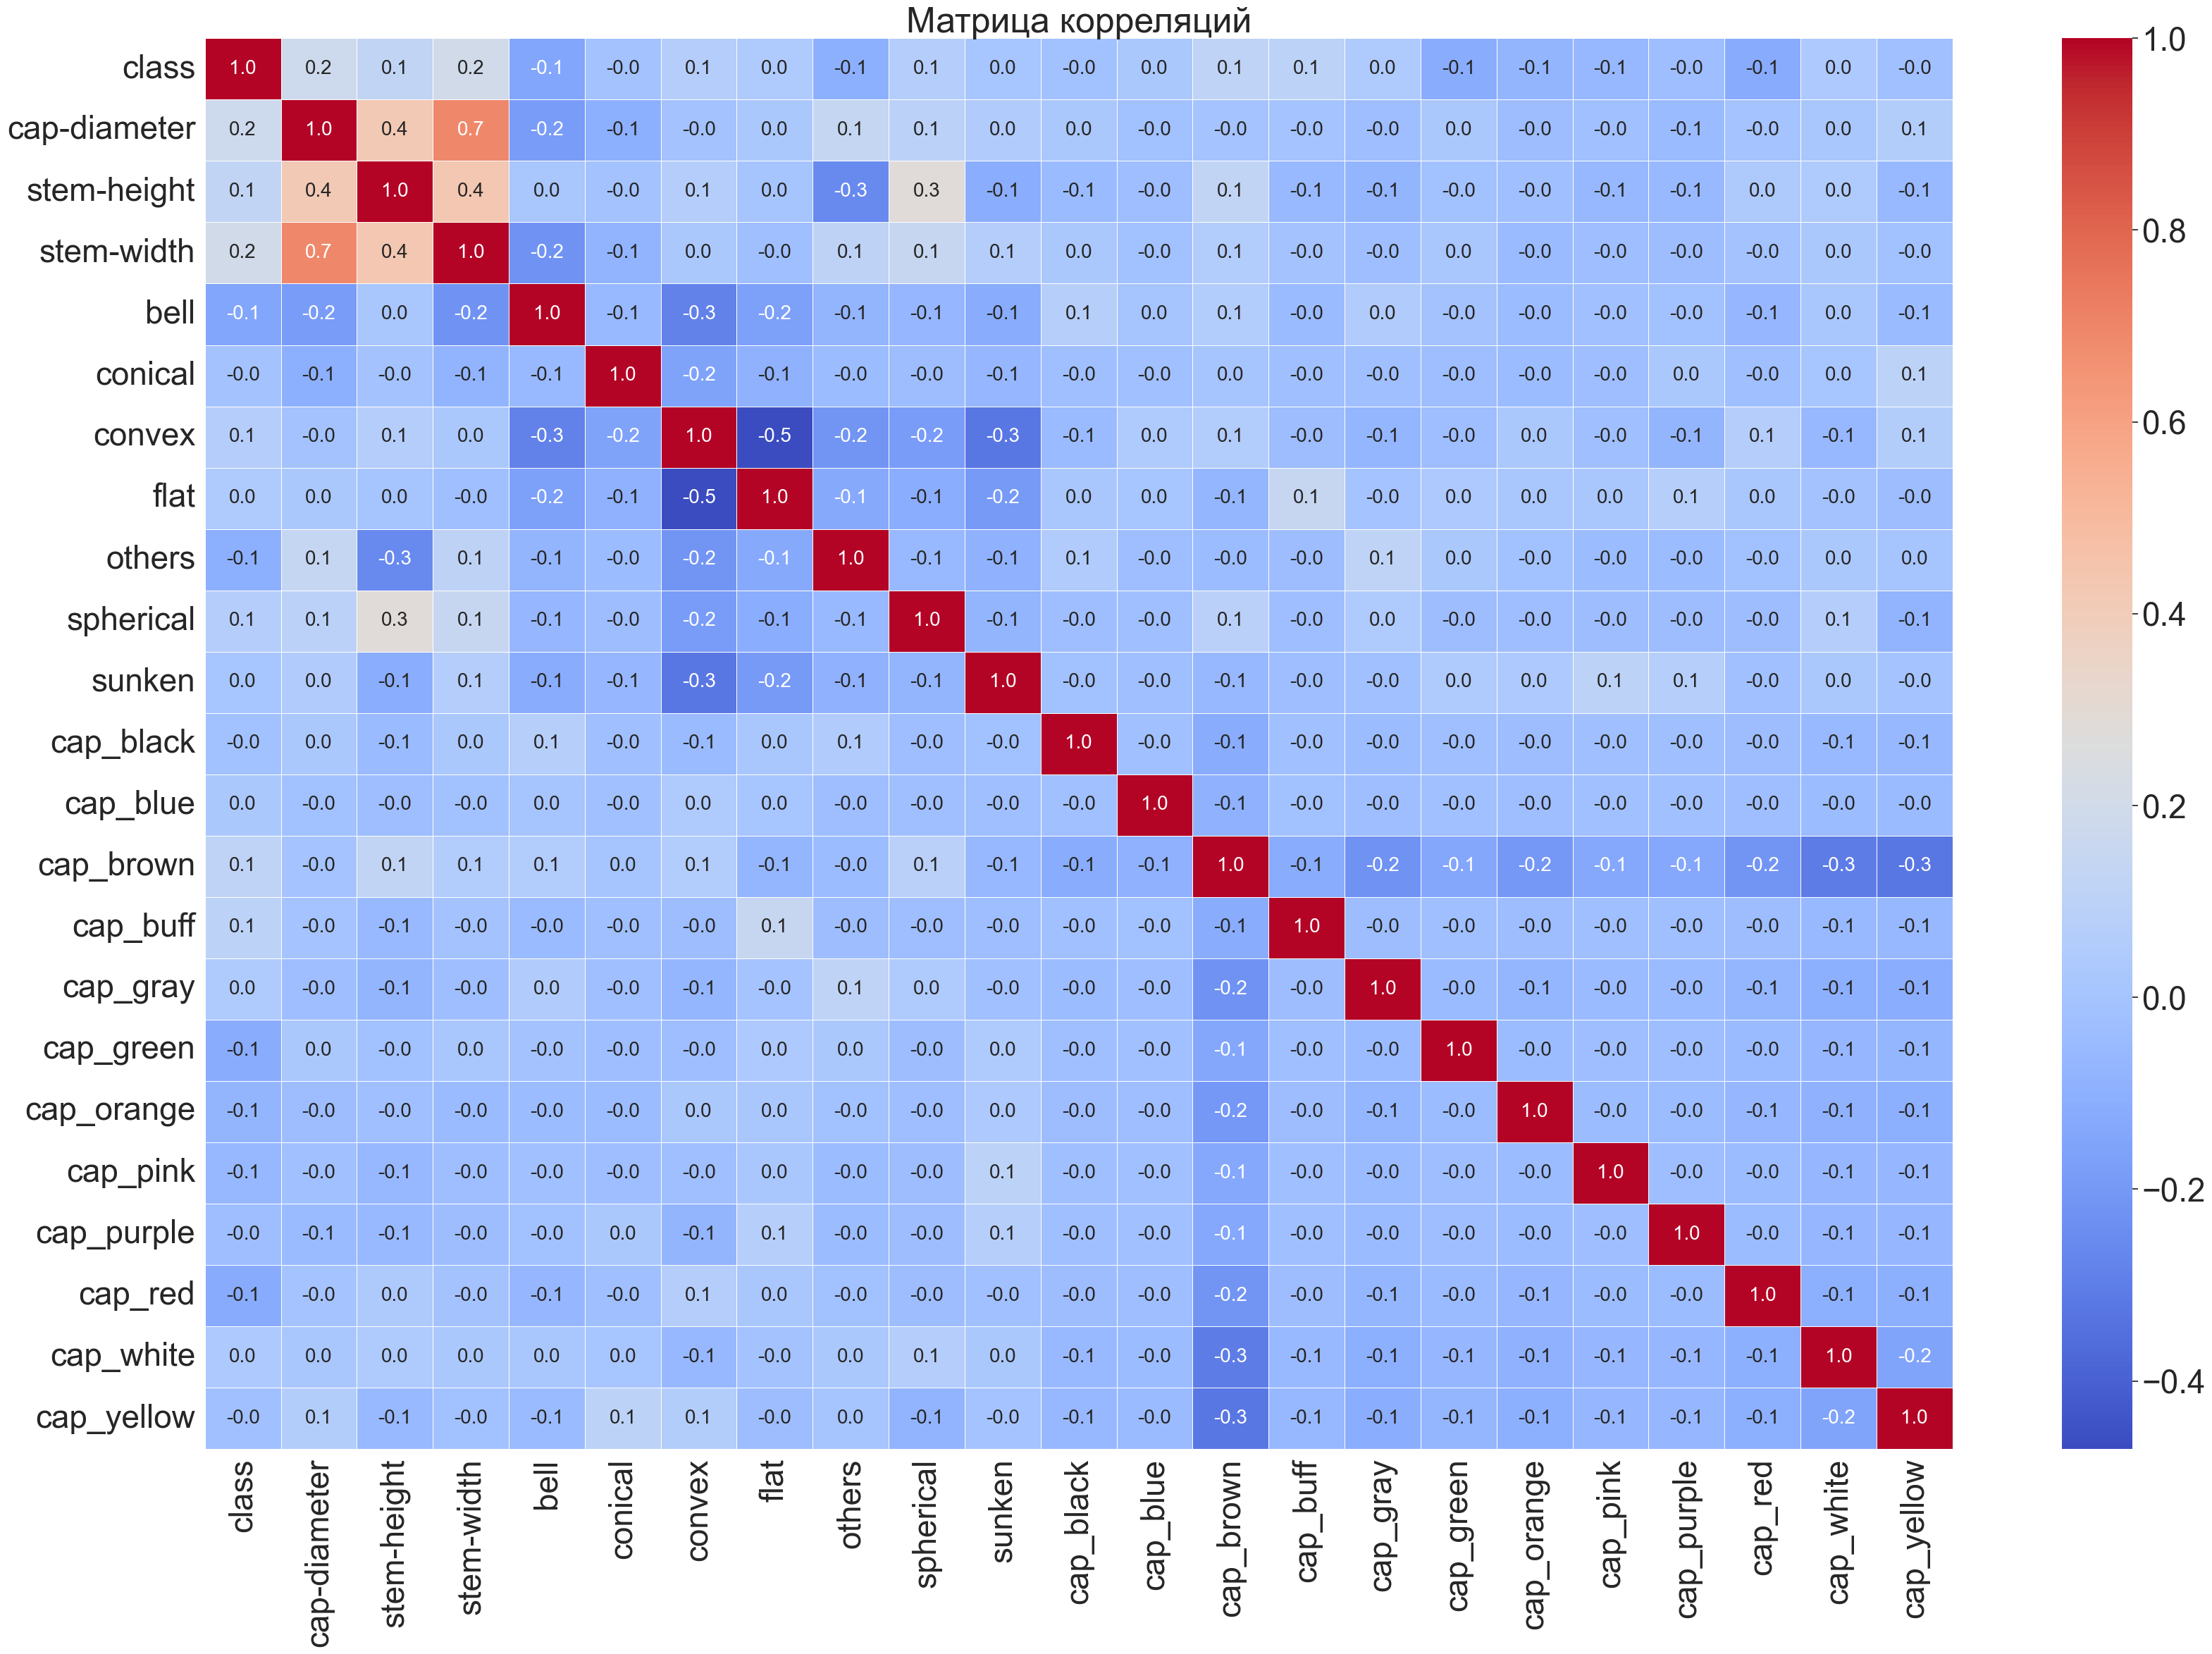

In [550]:
plt.figure(figsize = (40, 26))
sns.set(font_scale=3)
g = sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm', linewidth = 0.5, fmt = '.1f',  annot_kws={"size": 20})
                         # annot добавл. числовые значения к каждой ячейке   fmt = 1 знак после запятой
# g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
plt.title('Матрица корреляций')
plt.show()

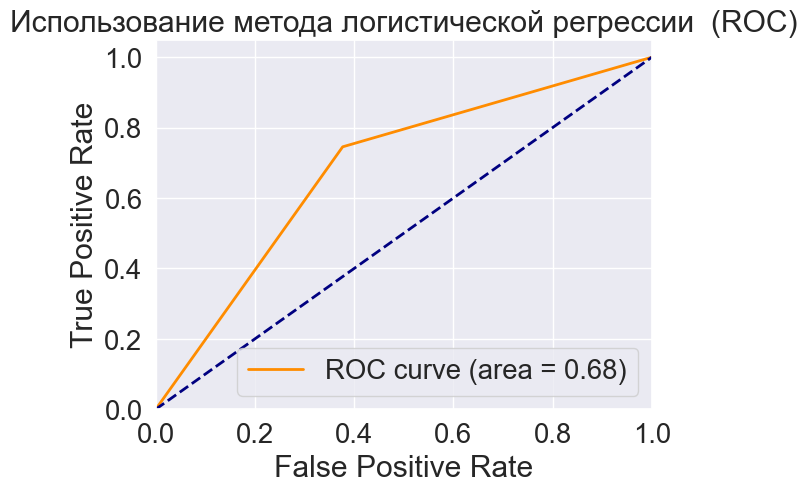

In [547]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Вычисление ROC кривой и ее площади
fpr, tpr, thresholds = roc_curve(ytest, pred_LR)
roc_auc = auc(fpr, tpr)

# Вывод ROC кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Использование метода логистической регрессии  (ROC)')
plt.legend(loc='lower right')
plt.show()

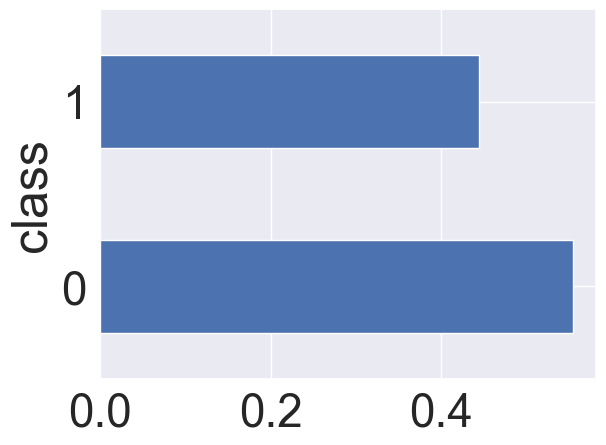

In [551]:
df2['class'].value_counts(normalize=True).plot(kind='barh')
plt.show()

In [553]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
print(f"Accuracy : {accuracy_score(ytest, pred_LR)}")
print(f"F1       : {f1_score(ytest, pred_LR, average = 'macro')}")
print(f"Precision: {precision_score(ytest, pred_LR, average = 'macro')}")
print(f"Recall   : {recall_score(ytest, pred_LR, average = 'macro')}")
print(f"Roc Auc  : {roc_auc_score(y, clf.predict_proba(x), multi_class='ovo')}")

Accuracy : 0.6782380874406418
F1       : 0.678222134628998
Precision: 0.6838565638951195
Recall   : 0.6843413036003563


NameError: name 'clf' is not defined